# Regresion Logistica Multiclase

One vs Rest
--> e.j. Tenemos tres clases a predecir (Cada una de las posibles clases y la evaluamos con el resto, haciendolo binomial para poder clasficiarlo en tres diferentes grupos, como una combinatoria)

Multinominal logistic classifier
    -->Usamos la funcionsofmax para clasificar los diferentes grupos obteniendo la probabilidad de cada grupo.

Scikit-learn solver
Parametro de la regresion logistica que puede aplicar a la multiclase ( hace referencia como voy a optimizar el descenso del gradiente para optimizar la funcion de costo) [Hay una tabla para seleccionar cuales son las mejores penalidades dependiendo si uso "L1" O "L2" con Multinominal o One vs rest]


## Importar librerías

In [1]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()

## Carga de datos

In [3]:
# Recuerda cambiar la ruta relativa del archivo
df = pd.read_csv('Datasets\Dry_Bean.csv')

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\AlexisBenitez\AppData\Local\Temp\ipykernel_9804\1644669335.py:2: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('Datasets\Dry_Bean.csv')


In [4]:
df.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [6]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


## Drop duplicates

In [7]:
df.drop_duplicates(inplace=True)

## Manejo de datos nulos

In [8]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

## undersampling

No hay valores nulos como se vio en la linea anterior, la regresion logistica se maneja mejor si tenemos dataset balanceados.

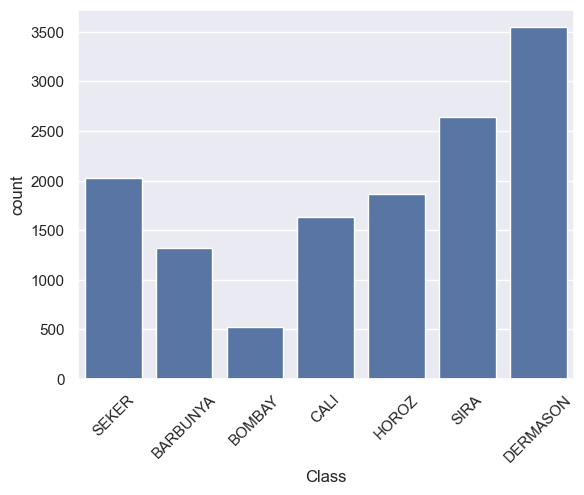

In [20]:
# sns.countplot(df.Class)
sns.countplot(x='Class', data=df)
plt.xticks(rotation=45)
plt.show()

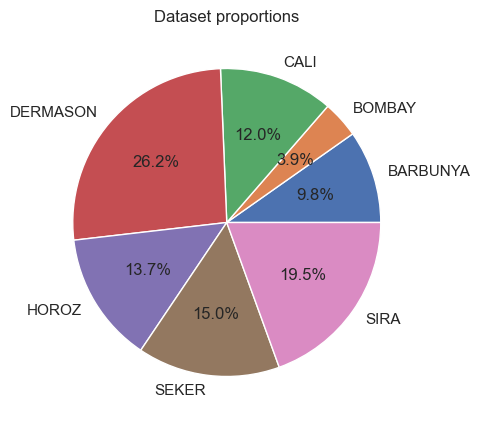

In [ ]:
# Otra manera de ver las proporciones del dataset

labels, counts = np.unique(df.Class, return_counts=True)

plt.figure(figsize=(5, 5))
plt.pie(counts, autopct='%1.1f%%', labels=labels)
plt.title('Dataset proportions')
plt.show()

In [23]:
# Para reoslver el problema de dataset no balanceado, vamos a llevar todas las clases a la altura de la minima 

# instalar antes "!pip install imblearn"

from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)

In [24]:
X = df.drop('Class',axis=1)
y = df.Class

In [25]:
X_over , y_over = undersample.fit_resample(X,y)

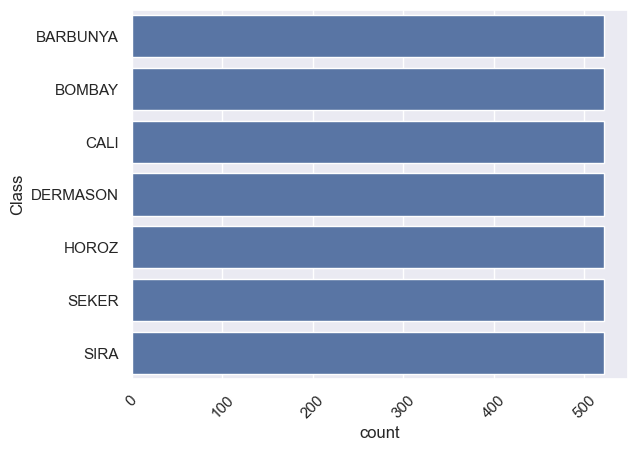

In [44]:
sns.countplot(y_over)
plt.xticks(rotation=45)
plt.show()

In [45]:
df.shape

(13543, 17)

In [ ]:
X_over.shape
# Perdemos datos, pero nuestro modelo gana

(3654, 16)

## Conversión a numéricos

In [47]:
list(np.unique(y_over))

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

In [48]:
y_over.replace(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'], [1,2,3,4,5,6,7], inplace=True)

C:\Users\AlexisBenitez\AppData\Local\Temp\ipykernel_9804\3533594566.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_over.replace(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'], [1,2,3,4,5,6,7], inplace=True)


In [49]:
list(np.unique(y_over))

[1, 2, 3, 4, 5, 6, 7]

## Análisis exploratorio de datos

### Corrrelations

In [ ]:
df_dea = X_over.copy(deep = True)
y_over = df_dea['Class']

In [53]:
df_dea

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
2754,70776,1060.894,386.619944,234.100208,1.651515,0.795842,71978,300.191276,0.775763,0.983300,0.790227,0.776451,0.005463,0.001225,0.602875,0.995658,1
2506,66370,1004.139,339.287072,249.883085,1.357783,0.676443,67637,290.697280,0.720536,0.981268,0.827169,0.856789,0.005112,0.001699,0.734087,0.996731,1
2267,60736,985.501,342.445302,226.741775,1.510288,0.749393,61680,278.085377,0.789353,0.984695,0.785854,0.812058,0.005638,0.001512,0.659438,0.995941,1
2449,65219,1011.110,353.650546,235.308999,1.502920,0.746512,66672,288.165594,0.719436,0.978207,0.801654,0.814831,0.005423,0.001475,0.663950,0.997864,1
2076,51332,889.637,330.822804,198.618899,1.665616,0.799716,52283,255.651975,0.751688,0.981811,0.815028,0.772776,0.006445,0.001418,0.597183,0.994678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8692,44358,785.631,288.303275,196.970714,1.463686,0.730225,44898,237.651761,0.791937,0.987973,0.903118,0.824312,0.006499,0.001851,0.679490,0.994560,7
7578,37641,742.538,284.313737,169.740814,1.674987,0.802227,38112,218.920099,0.744187,0.987642,0.857894,0.769995,0.007553,0.001638,0.592892,0.993087,7
7924,40668,747.000,271.731569,191.687622,1.417575,0.708780,41257,227.552424,0.712162,0.985724,0.915844,0.837416,0.006682,0.002027,0.701266,0.994097,7
9972,53233,893.511,329.969126,206.375684,1.598876,0.780273,54022,260.342775,0.689154,0.985395,0.837898,0.788991,0.006199,0.001482,0.622507,0.995312,7


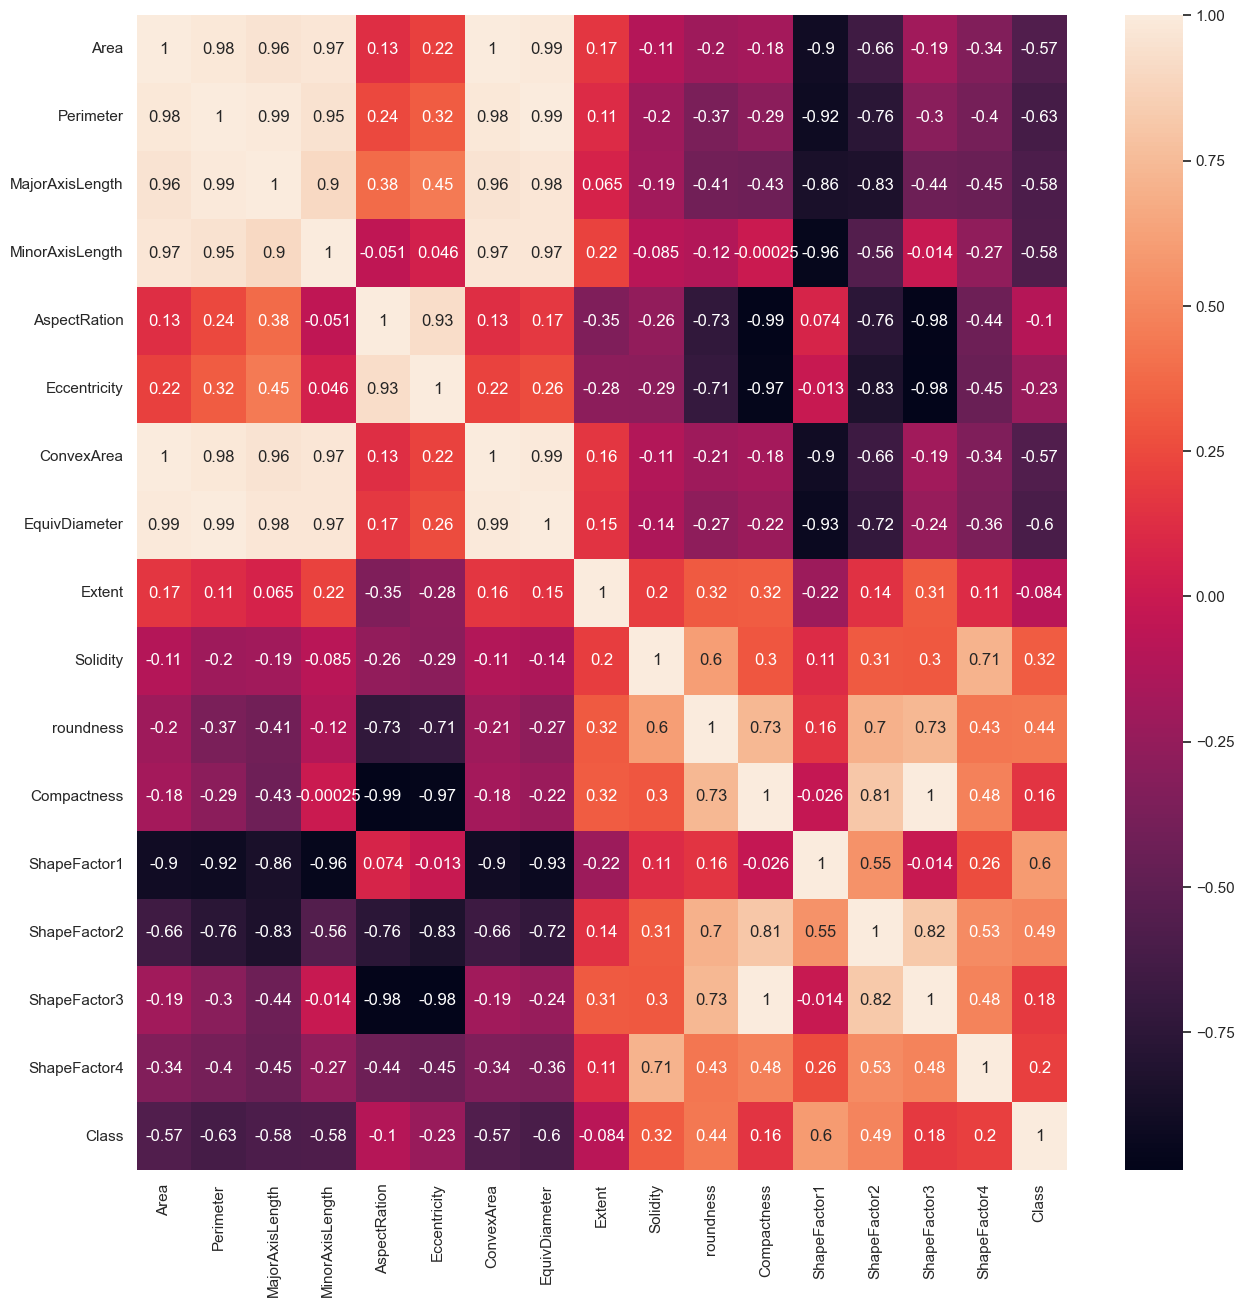

In [52]:
plt.figure(figsize=(15,15))
sns.heatmap(df_dea.corr(), annot=True)
plt.show()

In [54]:
# Elminamos varaibles altamente correlacionadas para que no afecten
X_over.drop(['ConvexArea','EquivDiameter'], axis=1, inplace=True) 

<Axes: >

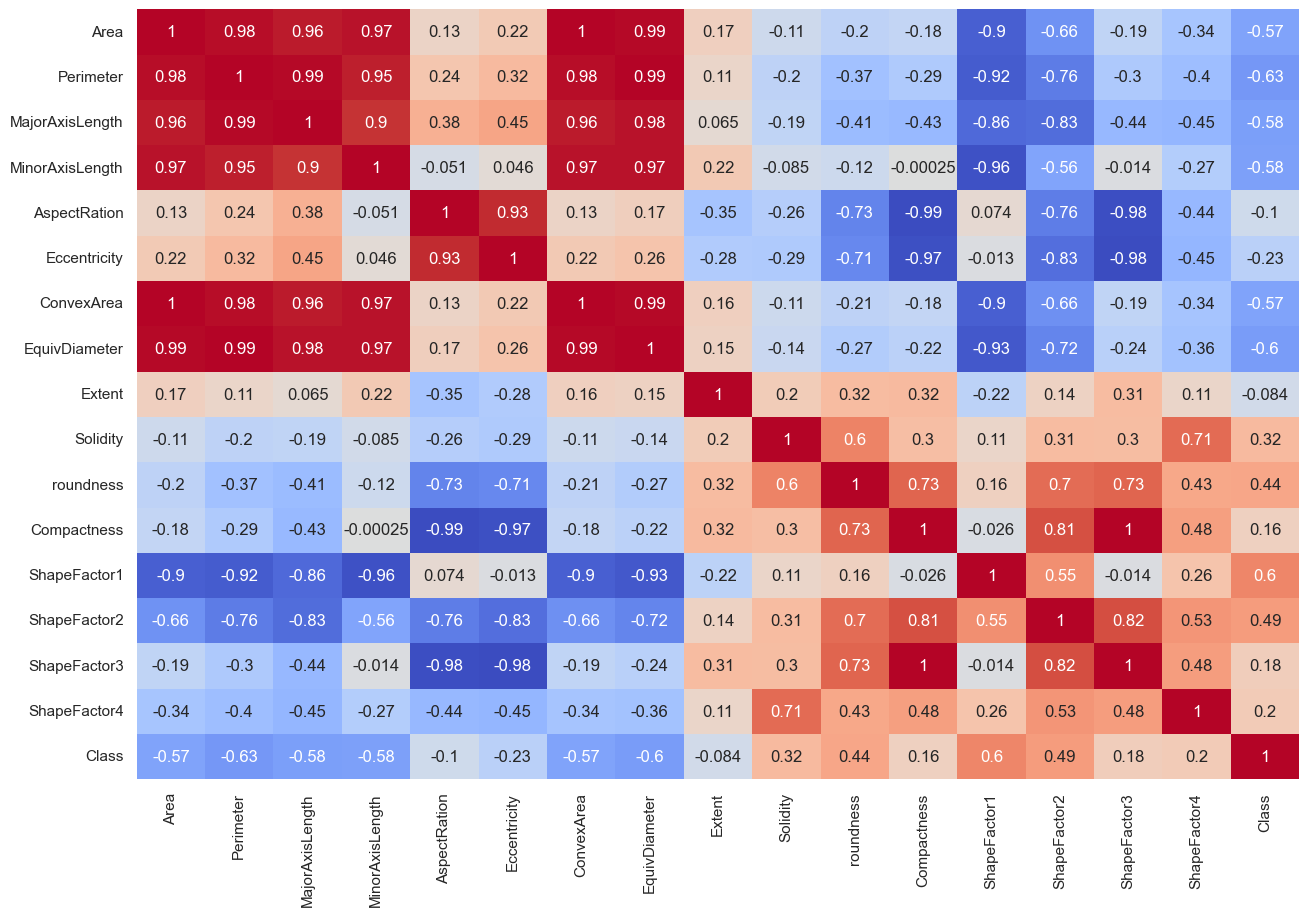

In [ ]:
# Repetimos para modificar el color 
plt.figure(figsize=(15,10))
sns.heatmap(df_dea.corr(), annot= True, cmap='coolwarm',cbar=False)

## Visualización de datos

EL siguiente codigo de tomara mucho tiempo a la maquina para porcesor toda la informacion, pues son muchas varaibles y datos que hay.

In [ ]:
#sns.pairplot(df_dea, hue='Class')

## Split y escalamiento de datos

In [ ]:
X_train, X_test, y_train , y_test = train_test_split(X_over, y_over, random_state=42, shuffle=True, test_size= 0.2)

In [ ]:
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train) 
X_test = st_x.transform(X_test) # No hacemos fit_transform porque sesgaria el modelo, por eso solo transform

## Modelo multiclase

In [58]:
def logistic_model(C_,solver_ , multiclass_):
    logistic_regression_model = LogisticRegression(random_state=42, solver= solver_, multi_class= multiclass_, n_jobs=-1, C=C_ )
    return logistic_regression_model

In [59]:
model = logistic_model(1,'saga','multinomial')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

c:\Users\AlexisBenitez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[[119   0   5   0   1   0   3]
 [  0  98   0   0   0   0   0]
 [  5   0  97   0   0   0   1]
 [  0   0   0  90   0   5  10]
 [  0   0   4   1  91   0   0]
 [  3   0   0   0   0  84   4]
 [  0   0   1   6   6   0  97]]
0.9247606019151847


c:\Users\AlexisBenitez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [60]:
multiclass = ['ovr','multinomial']
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
scores = []
params=[]
for i in multiclass:
    for j in solver_list:
        try:
            model = logistic_model(1,j,i)
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            params.append(i + '-'+ j)
            accuraccy = accuracy_score(y_test,predictions)
            scores.append(accuraccy)
        except:
            None    

c:\Users\AlexisBenitez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\AlexisBenitez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
c:\Users\AlexisBenitez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\AlexisBenitez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklea

## Evaluación de resultados

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'ovr-liblinear'),
  Text(1, 0, 'ovr-newton-cg'),
  Text(2, 0, 'ovr-lbfgs'),
  Text(3, 0, 'ovr-sag'),
  Text(4, 0, 'ovr-saga'),
  Text(5, 0, 'multinomial-newton-cg'),
  Text(6, 0, 'multinomial-lbfgs'),
  Text(7, 0, 'multinomial-sag'),
  Text(8, 0, 'multinomial-saga')])

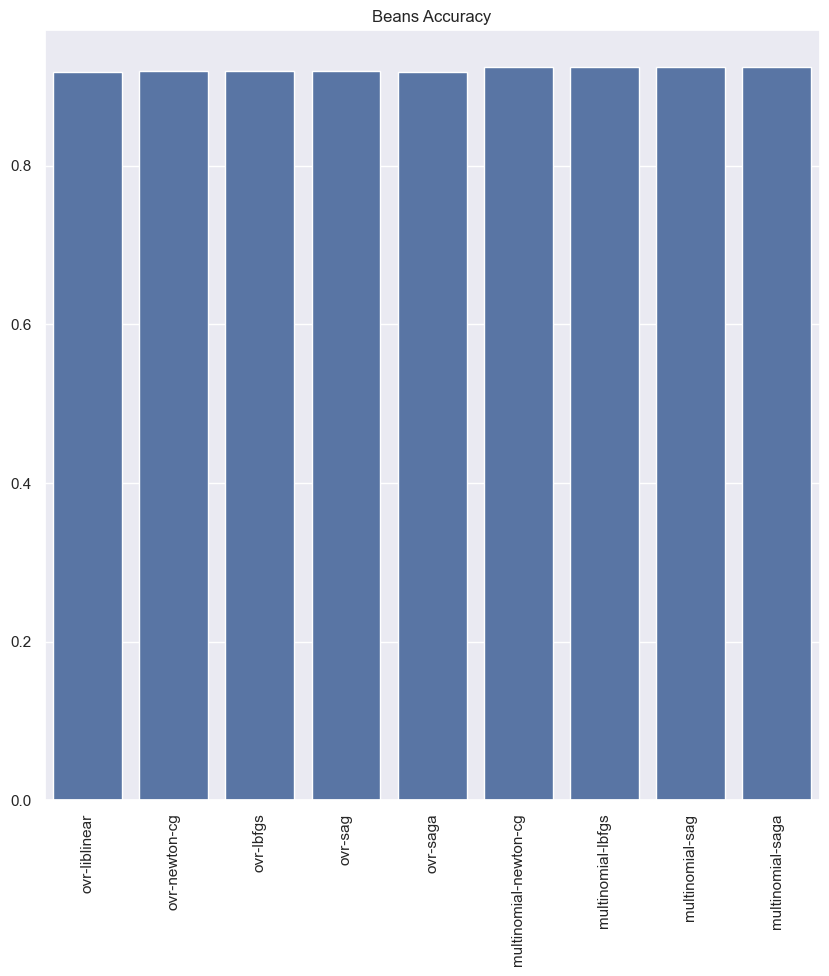

In [61]:
fig = plt.figure(figsize=(10,10))
sns.barplot(x=params, y=scores).set_title('Beans Accuracy')
plt.xticks(rotation=90)

C:\Users\AlexisBenitez\AppData\Local\Temp\ipykernel_9804\4128195504.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = ax.get_xticklabels(), rotation=66)


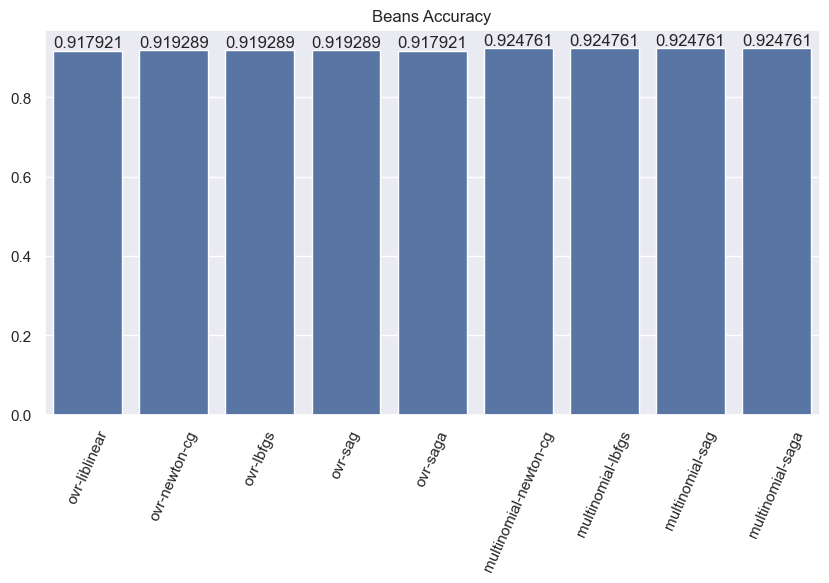

In [64]:
fig, ax1 = plt.subplots(figsize=(10,5))

ax = sns.barplot(
        ax=ax1,
        x  = params,
        y = scores
        )
ax.set_title('Beans Accuracy')
ax.set_xticklabels(labels = ax.get_xticklabels(), rotation=66)
ax.bar_label(ax.containers[0])
plt.show()

In [62]:
model = logistic_model(1,'newton-cg','multinomial')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[119   0   5   0   1   0   3]
 [  0  98   0   0   0   0   0]
 [  5   0  97   0   0   0   1]
 [  0   0   0  90   0   5  10]
 [  0   0   4   1  91   0   0]
 [  3   0   0   0   0  84   4]
 [  0   0   1   6   6   0  97]]
0.9247606019151847


c:\Users\AlexisBenitez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


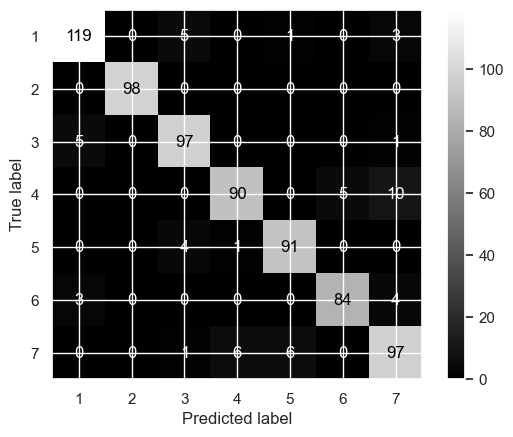

In [63]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()

### Extras


Primero hareos un cross val score para saber si hay overfitting o no.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5)

results = cross_val_score(model, X_test, y_test, cv=kfold)

In [66]:
print(results.mean())

0.9247786785947255


In [ ]:
from sklearn.model_selection import GridSearchCV 
import warnings

warnings.filterwarnings("ignore")

#paramenters grid
parameters = {
    "solver" : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    "multiclass" : ['ovr','multinomial']
}

logreg = LogisticRegression()

clif = GridSearchCV(logreg,
                   param_grid = parameters,
                   scoring= "accuraccy",
                   cv = 10)

clif.fit(X_train, y_train)



InvalidParameterError: The 'scoring' parameter of GridSearchCV must be a str among {'explained_variance', 'v_measure_score', 'precision_macro', 'rand_score', 'neg_mean_squared_error', 'd2_absolute_error_score', 'balanced_accuracy', 'jaccard_micro', 'neg_root_mean_squared_log_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'f1_samples', 'jaccard_macro', 'recall_macro', 'average_precision', 'neg_log_loss', 'top_k_accuracy', 'recall_samples', 'f1', 'f1_weighted', 'accuracy', 'roc_auc_ovr', 'precision', 'max_error', 'neg_mean_poisson_deviance', 'neg_brier_score', 'recall', 'recall_micro', 'homogeneity_score', 'mutual_info_score', 'roc_auc_ovo', 'neg_root_mean_squared_error', 'fowlkes_mallows_score', 'precision_weighted', 'roc_auc', 'precision_samples', 'roc_auc_ovo_weighted', 'completeness_score', 'neg_mean_absolute_error', 'f1_macro', 'neg_median_absolute_error', 'recall_weighted', 'jaccard_weighted', 'r2', 'precision_micro', 'adjusted_mutual_info_score', 'neg_mean_gamma_deviance', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'jaccard_samples', 'neg_mean_squared_log_error', 'roc_auc_ovr_weighted', 'jaccard', 'neg_mean_absolute_percentage_error', 'f1_micro', 'matthews_corrcoef'}, a callable, an instance of 'list', an instance of 'tuple', an instance of 'dict' or None. Got 'accuraccy' instead.